In [1]:
# import required packages
import torch
import pandas as pd
import numpy as np
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer

# Create class for data preparation
class SimpleDataset:
    def __init__(self, tokenized_texts):
        self.tokenized_texts = tokenized_texts
    
    def __len__(self):
        return len(self.tokenized_texts["input_ids"])
    
    def __getitem__(self, idx):
        return {k: v[idx] for k, v in self.tokenized_texts.items()}

In [2]:
# load tokenizer and model, create trainer
model_name = "j-hartmann/emotion-english-distilroberta-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)
trainer = Trainer(model=model)

In [3]:
data = pd.read_csv("/Users/wenxiu/Documents/GitHub/CZ4034-Information-Retrieval-Grp-28/data/processed/combined_vader_textblob_classified_data.csv").drop_duplicates()
data

/var/folders/n8/3f_jyqrd5r97gbpz42mt5mn00000gn/T/ipykernel_77238/1356840163.py:1: DtypeWarning: Columns (1,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/Users/wenxiu/Documents/GitHub/CZ4034-Information-Retrieval-Grp-28/data/processed/combined_vader_textblob_classified_data.csv").drop_duplicates()


,username,verified,followersCount,rawContent,date,replyCount,retweetCount,likeCount,url,hashtags,...,vader_preprocessing_text,vader_neg,vader_neu,vader_pos,vader_comp,class,TextBlob_Subjectivity,TextBlob_Polarity,TextBlob_Analysis,final_class
0,G_F758,False,343,Hogwarts Legacy Flight the Good Flight (SILVER...,18/2/2023 12:47,0,0,1.0,https://twitter.com/G_F758/status/162692648616...,"['PlayStationTrophy', 'PS5Share', 'HogwartsLeg...",...,hogwarts legacy flight the good flight (silver...,0.000,0.674,0.326,0.4404,1,0.600000,0.700000,1,0.0
1,DeVinSimmons,False,421,Oh and how smooth getting on and off the broom...,16/2/2023 5:27,0,0,0.0,https://twitter.com/DeVinSimmons/status/162609...,['HogwartsLegacy'],...,oh and how smooth getting on and off the broom...,0.000,1.000,0.000,0.0000,0,0.500000,0.400000,1,0.0
2,cozzboz,False,117,Playing endless hours of #HogwartsLegacy got m...,16/2/2023 14:34,0,0,0.0,https://twitter.com/cozzboz/status/16262284309...,['HogwartsLegacy'],...,playing endless hours of got me in the mood f...,0.000,0.904,0.096,0.2023,1,0.575000,-0.062500,-1,0.0
3,Fantastic_4ork,False,486,Hey #AvalancheSoftware how about that #photomo...,15/2/2023 19:24,0,0,3.0,https://twitter.com/Fantastic_4ork/status/1625...,"['AvalancheSoftware', 'photomode', 'hogwartsle...",...,hey how about that for ? adegaa$?a*adegaaa ...,0.000,1.000,0.000,0.0000,0,0.000000,0.000000,0,0.0
4,jordan_sebas2,False,487,Hogwarts Legacy Flight the Good Flight (SILVER...,15/2/2023 19:57,0,0,0.0,https://twitter.com/jordan_sebas2/status/16259...,"['PlayStationTrophy', 'PS5Share', 'HogwartsLeg...",...,hogwarts legacy flight the good flight (silver...,0.000,0.530,0.470,0.7964,1,0.533333,0.266667,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79545,Abfun77,False,382,Video of ELDEN RING: All Quests in Order + Mis...,22/2/2023 0:17,0,7,79.0,https://twitter.com/Abfun77/status/16281871857...,"['ELDENRING', 'ELDEN_RING', 'guide', 'gaming',...",...,video of elden ring: all quests in order + mis...,0.000,1.000,0.000,0.0000,0,0.767857,0.142857,1,0.0
79546,Vivern96,False,7,Red Wolf of Radagon RL1 NoHit #ELDEN_RING #ELD...,16/6/2022 14:29,0,0,1.0,https://twitter.com/Vivern96/status/1537442134...,"['ELDEN_RING', 'ELDENRING', 'gaming', 'game']",...,red wolf of radagon rl1 nohit,0.000,1.000,0.000,0.0000,0,0.000000,0.000000,0,0.0
79547,EllieCupcakes,False,263,Fanart of Miruku with her Apostle (Slim) and M...,3/3/2023 21:01,1,7,32.0,https://twitter.com/EllieCupcakes/status/16317...,"['EldenRing', 'EldenRingArt']",...,fanart of miruku with her apostle (slim) and m...,0.000,1.000,0.000,0.0000,0,0.000000,0.000000,0,0.0
79548,Pinknotess,False,0,This comic is definitely worth reading! Come c...,19/3/2023 3:42,0,0,0.0,https://twitter.com/Pinknotess/status/16372984...,"['EldenRing', 'illusrtationart', 'Romance']",...,this comic is definitely worth reading! come c...,0.000,0.607,0.393,0.6351,1,0.300000,0.359375,1,1.0


In [4]:
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
data['vader_preprocessing_text'] = data['vader_preprocessing_text'].apply(lambda x: ' '.join([word for word in x.split(' ') if word not in stopwords]))

In [5]:
data

,username,verified,followersCount,rawContent,date,replyCount,retweetCount,likeCount,url,hashtags,...,vader_preprocessing_text,vader_neg,vader_neu,vader_pos,vader_comp,class,TextBlob_Subjectivity,TextBlob_Polarity,TextBlob_Analysis,final_class
0,G_F758,False,343,Hogwarts Legacy Flight the Good Flight (SILVER...,18/2/2023 12:47,0,0,1.0,https://twitter.com/G_F758/status/162692648616...,"['PlayStationTrophy', 'PS5Share', 'HogwartsLeg...",...,"hogwarts legacy flight good flight (silver) ,",0.000,0.674,0.326,0.4404,1,0.600000,0.700000,1,0.0
1,DeVinSimmons,False,421,Oh and how smooth getting on and off the broom...,16/2/2023 5:27,0,0,0.0,https://twitter.com/DeVinSimmons/status/162609...,['HogwartsLegacy'],...,oh smooth getting broom,0.000,1.000,0.000,0.0000,0,0.500000,0.400000,1,0.0
2,cozzboz,False,117,Playing endless hours of #HogwartsLegacy got m...,16/2/2023 14:34,0,0,0.0,https://twitter.com/cozzboz/status/16262284309...,['HogwartsLegacy'],...,playing endless hours got mood hogwarts life ...,0.000,0.904,0.096,0.2023,1,0.575000,-0.062500,-1,0.0
3,Fantastic_4ork,False,486,Hey #AvalancheSoftware how about that #photomo...,15/2/2023 19:24,0,0,3.0,https://twitter.com/Fantastic_4ork/status/1625...,"['AvalancheSoftware', 'photomode', 'hogwartsle...",...,"hey ? adegaa$?a*adegaaa 1/2aC/aaaC/aaa-a,a",0.000,1.000,0.000,0.0000,0,0.000000,0.000000,0,0.0
4,jordan_sebas2,False,487,Hogwarts Legacy Flight the Good Flight (SILVER...,15/2/2023 19:57,0,0,0.0,https://twitter.com/jordan_sebas2/status/16259...,"['PlayStationTrophy', 'PS5Share', 'HogwartsLeg...",...,"hogwarts legacy flight good flight (silver) ,...",0.000,0.530,0.470,0.7964,1,0.533333,0.266667,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79545,Abfun77,False,382,Video of ELDEN RING: All Quests in Order + Mis...,22/2/2023 0:17,0,7,79.0,https://twitter.com/Abfun77/status/16281871857...,"['ELDENRING', 'ELDEN_RING', 'guide', 'gaming',...",...,video elden ring: quests order + missable cont...,0.000,1.000,0.000,0.0000,0,0.767857,0.142857,1,0.0
79546,Vivern96,False,7,Red Wolf of Radagon RL1 NoHit #ELDEN_RING #ELD...,16/6/2022 14:29,0,0,1.0,https://twitter.com/Vivern96/status/1537442134...,"['ELDEN_RING', 'ELDENRING', 'gaming', 'game']",...,red wolf radagon rl1 nohit,0.000,1.000,0.000,0.0000,0,0.000000,0.000000,0,0.0
79547,EllieCupcakes,False,263,Fanart of Miruku with her Apostle (Slim) and M...,3/3/2023 21:01,1,7,32.0,https://twitter.com/EllieCupcakes/status/16317...,"['EldenRing', 'EldenRingArt']",...,fanart miruku apostle (slim) miruku dancing el...,0.000,1.000,0.000,0.0000,0,0.000000,0.000000,0,0.0
79548,Pinknotess,False,0,This comic is definitely worth reading! Come c...,19/3/2023 3:42,0,0,0.0,https://twitter.com/Pinknotess/status/16372984...,"['EldenRing', 'illusrtationart', 'Romance']",...,comic definitely worth reading! come check out...,0.000,0.607,0.393,0.6351,1,0.300000,0.359375,1,1.0


In [78]:

pred_texts = data['vader_preprocessing_text'].dropna().astype('str').tolist()

In [79]:
len(pred_texts)

79550

In [82]:
# Tokenize texts and create prediction data set
tokenized_texts = tokenizer(pred_texts,truncation=True,padding=True)
pred_dataset = SimpleDataset(tokenized_texts)

In [83]:
# Run predictions
predictions = trainer.predict(pred_dataset)

***** Running Prediction *****
  Num examples = 9550
  Batch size = 8


  0%|          | 0/1194 [00:00<?, ?it/s]

In [84]:
# Transform predictions to labels
preds = predictions.predictions.argmax(-1)
labels = pd.Series(preds).map(model.config.id2label)
scores = (np.exp(predictions[0])/np.exp(predictions[0]).sum(-1,keepdims=True)).max(1)

In [85]:
# scores raw
temp = (np.exp(predictions[0])/np.exp(predictions[0]).sum(-1,keepdims=True))

In [86]:
anger = []
disgust = []
fear = []
joy = []
neutral = []
sadness = []
surprise = []

# extract scores (as many entries as exist in pred_texts)
for i in range(len(pred_texts)):
  anger.append(temp[i][0])
  disgust.append(temp[i][1])
  fear.append(temp[i][2])
  joy.append(temp[i][3])
  neutral.append(temp[i][4])
  sadness.append(temp[i][5])
  surprise.append(temp[i][6])

In [93]:
emotions

,Unnamed: 0,text,pred,label,score,anger,disgust,fear,joy,neutral,sadness,surprise
0,0.0,"hogwarts legacy flight good flight (silver) ,",3,joy,0.383004,0.061044,0.014948,0.144576,0.383004,0.289013,0.071977,0.035437
1,1.0,oh smooth getting broom,4,neutral,0.627945,0.021201,0.007525,0.029382,0.275928,0.627945,0.014963,0.023057
2,2.0,playing endless hours got mood hogwarts life ...,3,joy,0.497915,0.007949,0.001696,0.002788,0.497915,0.181111,0.161115,0.147426
3,3.0,"hey ? adegaa$?a*adegaaa 1/2aC/aaaC/aaa-a,a",3,joy,0.615335,0.010850,0.001685,0.002877,0.615335,0.114127,0.023618,0.231507
4,4.0,"hogwarts legacy flight good flight (silver) ,...",3,joy,0.755640,0.034374,0.003025,0.047185,0.755640,0.099875,0.038628,0.021273
...,...,...,...,...,...,...,...,...,...,...,...,...
9545,NaN,video elden ring: quests order + missable cont...,5,sadness,0.359736,0.081034,0.011193,0.153375,0.090417,0.153406,0.359736,0.150839
9546,NaN,red wolf radagon rl1 nohit,2,fear,0.422632,0.139983,0.020277,0.422632,0.143774,0.069709,0.153882,0.049743
9547,NaN,fanart miruku apostle (slim) miruku dancing el...,3,joy,0.372299,0.076597,0.012886,0.216736,0.372299,0.108119,0.124828,0.088535
9548,NaN,comic definitely worth reading! come check out...,3,joy,0.945957,0.004928,0.000632,0.008207,0.945957,0.020053,0.004484,0.015739


In [95]:
emotions.to_csv('emotions_analysis.csv')

In [6]:
emotions = pd.read_csv('emotions_analysis.csv')

In [7]:
emotions['label'].value_counts()

joy         27605
fear        21826
neutral     11358
surprise     8709
sadness      5377
anger        4309
disgust       366
Name: label, dtype: int64

In [8]:
combined_vader_textblob_classified_data = pd.read_csv('/Users/wenxiu/Documents/GitHub/CZ4034-Information-Retrieval-Grp-28/data/processed/combined_vader_textblob_classified_data.csv')
combined_vader_textblob_classified_data

/var/folders/n8/3f_jyqrd5r97gbpz42mt5mn00000gn/T/ipykernel_77238/59940836.py:1: DtypeWarning: Columns (1,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  combined_vader_textblob_classified_data = pd.read_csv('/Users/wenxiu/Documents/GitHub/CZ4034-Information-Retrieval-Grp-28/data/processed/combined_vader_textblob_classified_data.csv')


,username,verified,followersCount,rawContent,date,replyCount,retweetCount,likeCount,url,hashtags,...,vader_preprocessing_text,vader_neg,vader_neu,vader_pos,vader_comp,class,TextBlob_Subjectivity,TextBlob_Polarity,TextBlob_Analysis,final_class
0,G_F758,False,343,Hogwarts Legacy Flight the Good Flight (SILVER...,18/2/2023 12:47,0,0,1.0,https://twitter.com/G_F758/status/162692648616...,"['PlayStationTrophy', 'PS5Share', 'HogwartsLeg...",...,hogwarts legacy flight the good flight (silver...,0.000,0.674,0.326,0.4404,1,0.600000,0.700000,1,0.0
1,DeVinSimmons,False,421,Oh and how smooth getting on and off the broom...,16/2/2023 5:27,0,0,0.0,https://twitter.com/DeVinSimmons/status/162609...,['HogwartsLegacy'],...,oh and how smooth getting on and off the broom...,0.000,1.000,0.000,0.0000,0,0.500000,0.400000,1,0.0
2,cozzboz,False,117,Playing endless hours of #HogwartsLegacy got m...,16/2/2023 14:34,0,0,0.0,https://twitter.com/cozzboz/status/16262284309...,['HogwartsLegacy'],...,playing endless hours of got me in the mood f...,0.000,0.904,0.096,0.2023,1,0.575000,-0.062500,-1,0.0
3,Fantastic_4ork,False,486,Hey #AvalancheSoftware how about that #photomo...,15/2/2023 19:24,0,0,3.0,https://twitter.com/Fantastic_4ork/status/1625...,"['AvalancheSoftware', 'photomode', 'hogwartsle...",...,hey how about that for ? adegaa$?a*adegaaa ...,0.000,1.000,0.000,0.0000,0,0.000000,0.000000,0,0.0
4,jordan_sebas2,False,487,Hogwarts Legacy Flight the Good Flight (SILVER...,15/2/2023 19:57,0,0,0.0,https://twitter.com/jordan_sebas2/status/16259...,"['PlayStationTrophy', 'PS5Share', 'HogwartsLeg...",...,hogwarts legacy flight the good flight (silver...,0.000,0.530,0.470,0.7964,1,0.533333,0.266667,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79545,Abfun77,False,382,Video of ELDEN RING: All Quests in Order + Mis...,22/2/2023 0:17,0,7,79.0,https://twitter.com/Abfun77/status/16281871857...,"['ELDENRING', 'ELDEN_RING', 'guide', 'gaming',...",...,video of elden ring: all quests in order + mis...,0.000,1.000,0.000,0.0000,0,0.767857,0.142857,1,0.0
79546,Vivern96,False,7,Red Wolf of Radagon RL1 NoHit #ELDEN_RING #ELD...,16/6/2022 14:29,0,0,1.0,https://twitter.com/Vivern96/status/1537442134...,"['ELDEN_RING', 'ELDENRING', 'gaming', 'game']",...,red wolf of radagon rl1 nohit,0.000,1.000,0.000,0.0000,0,0.000000,0.000000,0,0.0
79547,EllieCupcakes,False,263,Fanart of Miruku with her Apostle (Slim) and M...,3/3/2023 21:01,1,7,32.0,https://twitter.com/EllieCupcakes/status/16317...,"['EldenRing', 'EldenRingArt']",...,fanart of miruku with her apostle (slim) and m...,0.000,1.000,0.000,0.0000,0,0.000000,0.000000,0,0.0
79548,Pinknotess,False,0,This comic is definitely worth reading! Come c...,19/3/2023 3:42,0,0,0.0,https://twitter.com/Pinknotess/status/16372984...,"['EldenRing', 'illusrtationart', 'Romance']",...,this comic is definitely worth reading! come c...,0.000,0.607,0.393,0.6351,1,0.300000,0.359375,1,1.0


In [9]:
combined_vader_textblob_classified_data['emotion_anger'] = emotions['anger']
combined_vader_textblob_classified_data['emotion_disgust'] = emotions['disgust']
combined_vader_textblob_classified_data['emotion_fear'] = emotions['fear']
combined_vader_textblob_classified_data['emotion_joy'] = emotions['joy']
combined_vader_textblob_classified_data['emotion_neutral'] = emotions['neutral']
combined_vader_textblob_classified_data['emotion_sadness'] = emotions['sadness']
combined_vader_textblob_classified_data['emotion_surprise'] = emotions['surprise']

In [10]:
combined_vader_textblob_classified_data.to_csv('combined_vader_textblob_classified_emotions_data.csv')

In [11]:
!pip install chardet
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import chardet
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.data.path.append("/usr/share/nltk_data")

import pandas as pd
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, Conv1D, MaxPooling1D, MaxPooling1D, GlobalMaxPooling1D, Dropout, Bidirectional
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
import re
import tensorflow as tf
import numpy as np
from keras.constraints import maxnorm
from tensorflow.keras.optimizers import Adamax 
from keras import regularizers
import ast
from keras.layers import Dense, Embedding, LSTM, Dropout, Bidirectional
from keras.constraints import maxnorm
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.optimizers import Adamax
from keras import regularizers
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.constraints import maxnorm
from tensorflow.keras.optimizers import Adam 
from matplotlib import pyplot as plt
import chardet
from tensorflow.keras.initializers import he_uniform

[nltk_data] Downloading package punkt to /Users/wenxiu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/wenxiu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/wenxiu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/wenxiu/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [12]:
data = pd.read_csv('combined_vader_textblob_classified_emotions_data.csv')

/var/folders/n8/3f_jyqrd5r97gbpz42mt5mn00000gn/T/ipykernel_77238/1422877490.py:1: DtypeWarning: Columns (2,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('combined_vader_textblob_classified_emotions_data.csv')


In [13]:
data['processed'] = data['processed'].apply(ast.literal_eval)
data['use_col'] = data['processed'].apply(lambda x: ' '.join(x))

In [14]:
data['use_col']

0        hogwarts legacy flight the good flight silver ...
1            oh and how smooth get on and off the broom be
2        play endless hours of get me in the mood for s...
3                        hey how about that for d d 1 2aai
4        hogwarts legacy flight the good flight silver ...
                               ...                        
79545    video of elder ring all quest in order disable...
79546     red wolf of dragon rl1 not https t co avnntrkqdo
79547    apart of miruku with her apostle slim and miru...
79548    this comic be definitely worth read come check...
79549    new video be out now d who the judge be this m...
Name: use_col, Length: 79550, dtype: object

In [15]:
X = data[['emotion_anger', 'emotion_disgust', 'emotion_fear', 'emotion_joy', 'emotion_neutral', 'emotion_sadness', 'emotion_surprise', 'use_col']]
labels = data['final_class']

labels = tf.keras.utils.to_categorical(labels, 3, dtype="float32")
tokenizer = Tokenizer(num_words=30000, split=' ')
tokenizer.fit_on_texts(data['use_col'].values)
maxlen=200

X_train, X_test, Y_train, Y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

X1_train = tokenizer.texts_to_sequences(X_train['use_col'].values)
X1_train = pad_sequences(X1_train, padding='post', maxlen=maxlen)

X1_test = tokenizer.texts_to_sequences(X_test['use_col'].values)
X1_test = pad_sequences(X1_test, padding='post', maxlen=maxlen)

In [16]:
X2_train = X_train[['emotion_anger', 'emotion_disgust', 'emotion_fear', 'emotion_joy', 'emotion_neutral', 'emotion_sadness', 'emotion_surprise']].values
X2_test = X_test[['emotion_anger', 'emotion_disgust', 'emotion_fear', 'emotion_joy', 'emotion_neutral', 'emotion_sadness', 'emotion_surprise']].values

In [17]:
print(X1_train.shape)
print(X1_test.shape)
print(X2_train.shape)
print(X2_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(63640, 200)
(15910, 200)
(63640, 7)
(15910, 7)
(63640, 3)
(15910, 3)


In [18]:
from keras.layers import Concatenate
from keras.models import Model, Sequential
from keras.layers import Dense, Input
from keras.callbacks import EarlyStopping

model1_in = Input(shape=(maxlen,))

embedding_layer = Embedding(input_dim=30000, output_dim=40, input_length=X1_train.shape[1])(model1_in)
dropout_1 = Dropout(0.7)(embedding_layer)
bilstm_1 = Bidirectional(LSTM(units=128, return_sequences=True, kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(0.01)))(embedding_layer)
dropout_2 = Dropout(0.7)(bilstm_1)
model1_out = Bidirectional(LSTM(units=64, return_sequences=False, kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(0.01)))(dropout_2)

model2_in = Input(shape=(7,))
model2_out = Dense(10, activation='relu')(model2_in)

concat_layer = Concatenate()([model1_out, model2_out])
dense_layer_3 = Dense(10, activation='relu')(concat_layer)
output = Dense(3, activation='softmax')(dense_layer_3)
model = Model(inputs=[model1_in, model2_in], outputs=output)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, mode='min', restore_best_weights=True)



In [140]:
history = model.fit(x=[X1_train, X2_train], y=[Y_train,Y_train], epochs = 25, batch_size=256, validation_data=([X1_test, X2_test] , [Y_test, Y_test]), callbacks=[early_stopping])

Epoch 1/25
249/249 [==============================] - 295s 1s/step - loss: 11.3683 - categorical_accuracy: 0.6730 - val_loss: 2.9502 - val_categorical_accuracy: 0.8086
Epoch 2/25
249/249 [==============================] - 286s 1s/step - loss: 1.4006 - categorical_accuracy: 0.8352 - val_loss: 0.8016 - val_categorical_accuracy: 0.8095
Epoch 3/25
249/249 [==============================] - 295s 1s/step - loss: 0.6035 - categorical_accuracy: 0.8391 - val_loss: 0.5722 - val_categorical_accuracy: 0.8314
Epoch 4/25
249/249 [==============================] - 307s 1s/step - loss: 0.4274 - categorical_accuracy: 0.8827 - val_loss: 0.5172 - val_categorical_accuracy: 0.8398
Epoch 5/25
249/249 [==============================] - 291s 1s/step - loss: 0.3727 - categorical_accuracy: 0.8987 - val_loss: 0.5010 - val_categorical_accuracy: 0.8436
Epoch 6/25
249/249 [==============================] - 296s 1s/step - loss: 0.3392 - categorical_accuracy: 0.9064 - val_loss: 0.5437 - val_categorical_accuracy: 0.83

In [19]:
history = model.fit(x=[X1_train, X2_train], y=[Y_train,Y_train], epochs = 25, batch_size=256, validation_data=([X1_test, X2_test] , [Y_test, Y_test]))

Epoch 1/25


2023-04-05 12:26:08.844484: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


249/249 [==============================] - 285s 1s/step - loss: 11.3308 - categorical_accuracy: 0.6615 - val_loss: 2.9050 - val_categorical_accuracy: 0.8214
Epoch 2/25
249/249 [==============================] - 291s 1s/step - loss: 1.3421 - categorical_accuracy: 0.8490 - val_loss: 0.6629 - val_categorical_accuracy: 0.8480
Epoch 3/25
249/249 [==============================] - 286s 1s/step - loss: 0.4548 - categorical_accuracy: 0.8790 - val_loss: 0.4898 - val_categorical_accuracy: 0.8454
Epoch 4/25
249/249 [==============================] - 289s 1s/step - loss: 0.4065 - categorical_accuracy: 0.8795 - val_loss: 0.4820 - val_categorical_accuracy: 0.8487
Epoch 5/25
249/249 [==============================] - 287s 1s/step - loss: 0.3389 - categorical_accuracy: 0.9035 - val_loss: 0.5094 - val_categorical_accuracy: 0.8379
Epoch 6/25
249/249 [==============================] - 289s 1s/step - loss: 0.4574 - categorical_accuracy: 0.8687 - val_loss: 0.5210 - val_categorical_accuracy: 0.8459
Epoch 7/

In [21]:
from sklearn.metrics import f1_score, classification_report

# Get the predicted probabilities on the test set
y_pred_prob = model.predict([X1_test, X2_test])

# Convert the predicted probabilities to integer class labels
y_pred = y_pred_prob.argmax(axis=-1)

# Convert the one-hot encoded labels to integers
y_true = Y_test.argmax(axis=-1)

# Calculate the F1 score
f1 = f1_score(y_true, y_pred, average='macro')
print("F1 score:", f1)

498/498 [==============================] - 46s 89ms/step
F1 score: 0.829721811510193


In [27]:
from sklearn.metrics import f1_score, classification_report
report = classification_report(y_true, y_pred, target_names=['-1','0','1'])
print(report)

              precision    recall  f1-score   support

          -1       0.89      0.80      0.84      6017
           0       0.80      0.85      0.82      5511
           1       0.79      0.85      0.82      4382

    accuracy                           0.83     15910
   macro avg       0.83      0.83      0.83     15910
weighted avg       0.83      0.83      0.83     15910



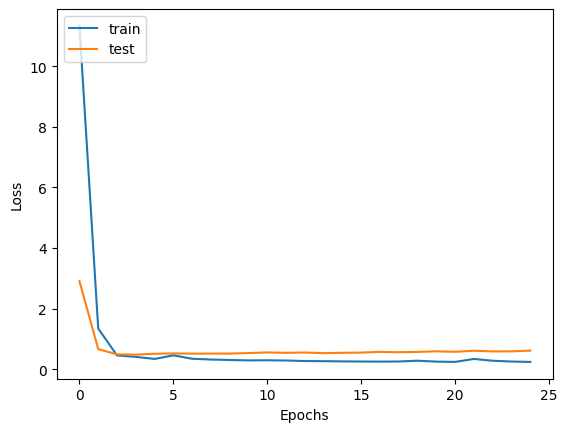

In [28]:
# Plotting the losses
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('./overall_loss.png')

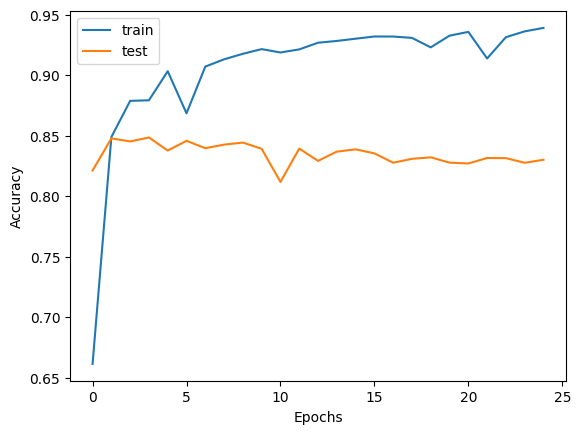

In [29]:
# Plotting the accuracies
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('./overall_acc.png')